Estimating biases using als...
RMSE: 0.9438
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9523
RMSE: 0.9377
RMSE: 0.9203


array([0.92031227, 0.93768831, 0.94382854, 0.95226513])

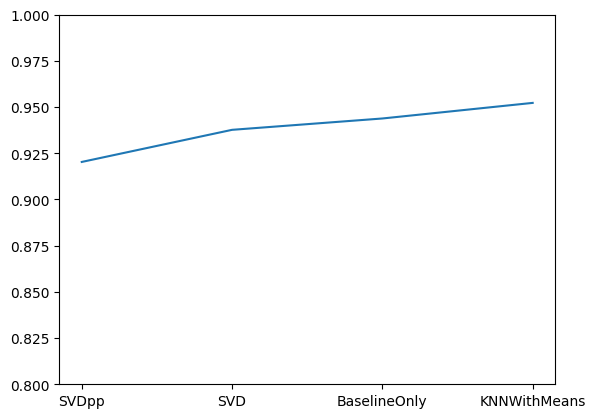

In [1]:
# Surprise - 알고리즘 비교

import numpy as np
import pandas as pd

# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

# Train/Test 분리 
trainset, testset = train_test_split(data, test_size=0.25)

##### (1)

# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)       # 알고리즘 이름 
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

# 결과를 그래프로 표시
import matplotlib.pyplot as plt
index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]
